In [2]:
import pandas as pd 
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt



In [3]:
# create synthetic dataset
X,y = make_classification(n_samples=10000,n_features= 10,n_informative=5, n_classes=2, random_state=42)

#split into training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#train random forest model 
rf = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)
rf.fit(X_train,y_train)



RandomForestClassifier(max_depth=10, random_state=42)

In [4]:
#predict and evaluate 

y_pred = rf.predict(X_test)

print("Accuaracy", accuracy_score(y_test,y_pred))
print("Confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("classification_report:\n",classification_report(y_test,y_pred))


Accuaracy 0.938
Confusion_matrix:
 [[926  65]
 [ 59 950]]
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       991
           1       0.94      0.94      0.94      1009

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [5]:
# 🌳 4. Feature Importances

importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': [f'Feature {i}' for i in range(X.shape[1])],
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)


Feature Importances:
      Feature  Importance
4  Feature 4    0.257092
6  Feature 6    0.194644
0  Feature 0    0.166592
1  Feature 1    0.099363
7  Feature 7    0.087073
3  Feature 3    0.082691
2  Feature 2    0.079943
8  Feature 8    0.011194
9  Feature 9    0.010947
5  Feature 5    0.010461


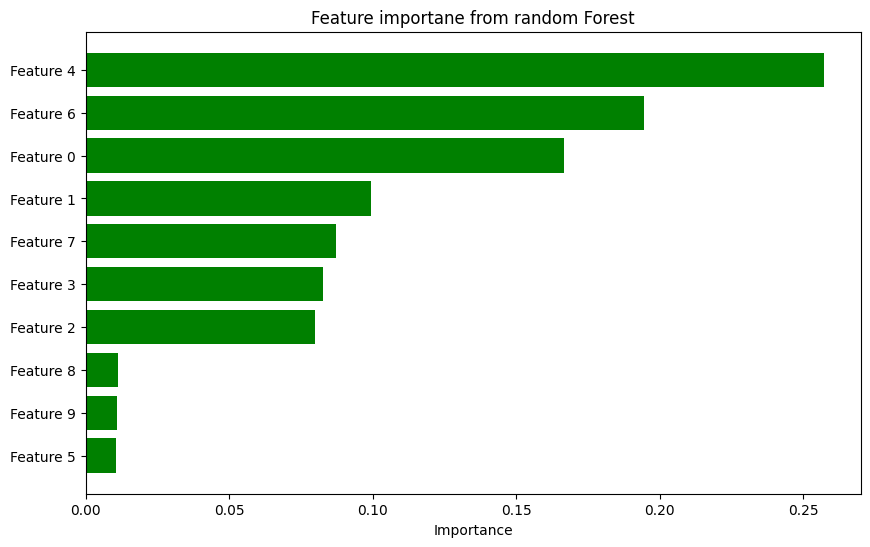

In [6]:
#plot feature importances 

plt.figure(figsize=(10,6))
plt.barh(importance_df["Feature"],importance_df["Importance"],color="green")
plt.xlabel("Importance")
plt.title("Feature importane from random Forest")
plt.gca().invert_yaxis()
plt.show()



In [7]:
# checking whether model is overfitted or underfitted 

#evaluate on trainig data

y_train_pred=  rf.predict(X_train)

train_acc = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:\n",train_acc)


Training Accuracy:
 0.974875


In [8]:
## felt like model got over fitted , does it mean model performs better with trained data but not on new samples
 


In [ ]:
# hyper parameter tuning 
from sklearn.model_selection import GridSearchCV


param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [6, 10, 14],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 3]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv = 5, scoring="accuracy")
grid_search.fit(X_train,y_train)

print("Best parameters:\n",grid_search.best_params_)
print("best cross-validation accuracy:", grid_search.best_score_)


#evaluate on test data 
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Test Accuracy of Best Model:\n",accuracy_score(y_test,y_pred_best))

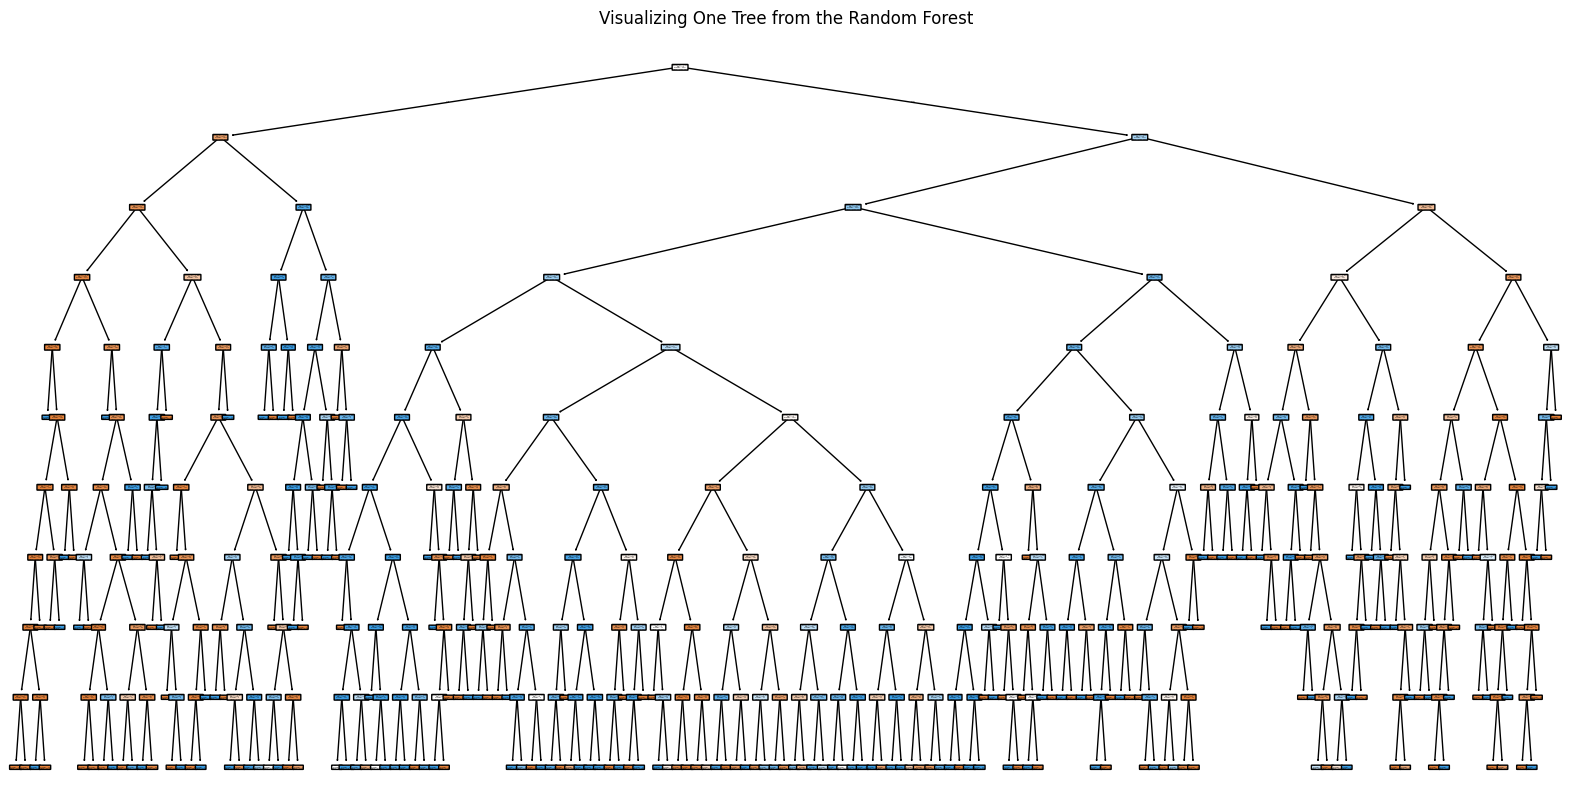

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pick a single tree from the forest
estimator = rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=[f'Feature {i}' for i in range(X.shape[1])],
          filled=True, rounded=True)
plt.title("Visualizing One Tree from the Random Forest")
plt.show()
